In [564]:
import collections
import networkx as nx
import numpy as np
import os
import random
from sklearn import linear_model

In [562]:
# plot settings
import matplotlib.pyplot as plt
SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [2]:
g = nx.read_edgelist('../network/networks/edge_list.txt',
                     create_using=nx.DiGraph(), nodetype=int, data=False)

In [3]:
g_und = g.to_undirected()

# Caratteristiche generali

In [240]:
in_degrees = [d for id, d in g.in_degree()]
out_degrees = [d for id, d in g.out_degree()]
degrees = [d for id,d in g_und.degree()]

# ordinamento
in_degrees.sort(reverse=True)
out_degrees.sort(reverse=True)
degrees.sort(reverse=True)

In [242]:
g_info= {}
g_info['N'] = nx.number_of_nodes(g)
g_info['L'] = nx.number_of_edges(g)
g_info['d_avg_dir'] = int(np.mean(in_degrees))

g_info['d_in_max'] = np.max(in_degrees)
g_info['d_in_min'] = np.min(in_degrees)

g_info['d_out_max'] = np.max(out_degrees)
g_info['d_out_min'] = np.min(out_degrees)

## statistiche per grafo non diretto
g_und_info = {}
g_und_info['d_avg_und'] = int(np.mean(degrees))
g_und_info['d_und_max'] = np.max(degrees)
g_und_info['d_und_min'] = np.min(degrees)
g_info

{'L': 2501757,
 'N': 65729,
 'd_avg_dir': 38,
 'd_in_max': 19064,
 'd_in_min': 0,
 'd_out_max': 4130,
 'd_out_min': 0}

Domande:
- chi sono gli users che hanno il valore massimo di degree entrante/uscente?
- che caratteristiche in comune hanno?


In [566]:
in_degree_counts = collections.Counter(d for n, d in g.in_degree())
degree_in= np.arange(len(in_degree_counts))
in_degree_counts = [in_degree_counts.get(i, 0) for i in range(max(in_degree_counts) + 1) if in_degree_counts.get(i,0)>0]
in_degree_probs = np.array(in_degree_counts).astype(float)/g_info['N']

In [567]:
out_degree_counts = collections.Counter(d for n, d in g.out_degree())
degree_out= np.arange(len(out_degree_counts))
out_degree_counts = [out_degree_counts.get(i, 0) for i in range(max(out_degree_counts) + 1) if out_degree_counts.get(i,0)>0]
out_degree_probs = np.array(out_degree_counts).astype(float)/g_info['N']

In [569]:
g_info['N']

65729

In [570]:
begin = 30
end = 200
counts_Y = np.log(in_degree_probs[begin:end])
degree_X = np.log(degree[begin:end]).astype(float)
degree_X=degree_X.reshape(end-begin,1)
regr = linear_model.LinearRegression()
regr.fit(degree_X, counts_Y)
count_pred = regr.predict(degree_X)+0.5

In [571]:
print regr.coef_[0]
print regr.intercept_
print regr.score(degree_X, counts_Y)

-1.64533850716
0.285776511621
0.95378108165


In [572]:
def regression(degree, degree_degree_probs, begin, end, h_adjust=-0, color= "black"):
    counts_Y = np.log(in_degree_probs[begin:end])
    degree_X = np.log(degree[begin:end]).astype(float)
    degree_X=degree_X.reshape(end-begin,1)
    regr = linear_model.LinearRegression()
    regr.fit(degree_X, counts_Y)
    count_pred = regr.predict(degree_X)+h_adjust
    plt.plot( np.exp(degree_X), np.exp(count_pred), color="black")
    return regr.coef_[0]

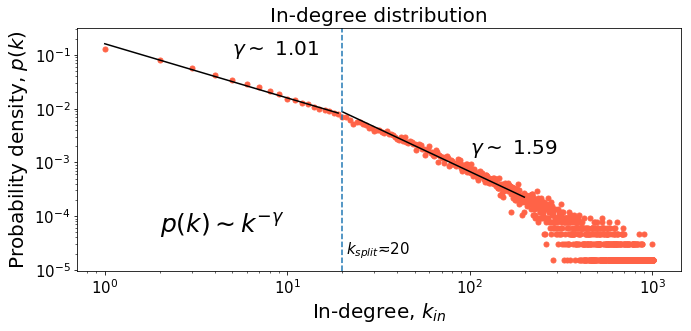

In [622]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(degree_in, in_degree_probs, '.', color='tomato',   label='Original', markersize = 10)
##plt.plot(degree_out, out_degree_probs, '.', color='green',   label='Original')

split =20
gamma_in_1 = -regression(degree, in_degree_probs, 1,split).round(2)
gamma_in_2 = -regression(degree, in_degree_probs, split,200).round(2)
gamma_in_1_str = "{:.2f}".format(gamma_in_1)

plt.text(5, (float(1)/10), "$\gamma \sim $ {}".format(gamma_in_1))
plt.text(100,float(1)/700, "$\gamma \sim $ {}".format(gamma_in_2))
plt.text(2,float(1)/20000, "$p(k) \sim k^{-\gamma}  $ ",fontsize =25)
# split
plt.axvline(split, 0,1000, linestyle='--')
plt.text(split+1, float(1)/50000, "$k_{split} \eqsim$"+"{}".format(20), fontsize=SMALL_SIZE)

plt.title("In-degree distribution")
plt.xlabel("In-degree, $k_{in}$")
plt.ylabel("Probability density, $p(k)$")                                     
plt.loglog()
plt.tight_layout()
plt.savefig("imgs/in_degree_distribution.pdf")                                     